In [1]:
# Setup
import pandas as pd

data = pd.read_csv('../src/cleaned_data.csv')
raw = pd.read_csv('../src/raw_data.csv')
popdense_data = pd.read_csv('../src/cleaned_with_popdensity.csv')
model_data = pd.read_csv('../src/model_data.csv')

In [2]:
import plotly
import plotly.express as px
import scipy.stats as stats

# Pt1: Exploriation

In [ ]:
# data.head()
model_data.nunique()
# data.info()


In [ ]:
data.columns

In [ ]:
# data['PropertySubType'].unique()
# raw_data['District'].unique()
# data['Condition'].unique()
data['SaleType'].unique()


In [ ]:
# data['Condition'].value_counts()
# data['SaleType'].value_counts()
data['ConstructionYear'].value_counts()

In [12]:
model_data['Price'].max()

15000000.0

# Pt 2: Exploring stats

How many observations and features do you have?


In [28]:
model_data.shape

(35014, 36)

What is the proportion of missing values per column? -> double check for bias in proportion: poolspace will be missing for most appartments I guess, change to None instead of missing


In [64]:
# Proportion = n / total (18598 or data.shape[0]) *100
for column in data.columns:
    missingprop = data[column].isna().sum() / data.shape[0] *100
    if missingprop > 0 :
        print(f'{column}: {round(missingprop, 2)}%')

What variables are most subject to outliers?


In [17]:
# calculate IQR for column
for column in model_data.columns:
    if column in ['Price', 'ConstructionYear','BedroomCount', 'LivingArea', 'TerraceArea', 'GardenArea', 'Facades', 'PopulationDensity']:
        print(column)
        # setting IQR
        model_data[column].dropna()
        Q1 = model_data[column].quantile(0.25)
        Q3 = model_data[column].quantile(0.75)
        IQR = Q3 - Q1
        # identify outliers
        threshold = 1.5
        outliers = model_data[(model_data[column] < Q1 - threshold * IQR) | (model_data[column] > Q3 + threshold * IQR)]
        lower = model_data[(model_data[column] < Q1 - threshold * IQR)]
        upper = model_data[(model_data[column] > Q3 + threshold * IQR)]
        # print(len(outliers), f'outliers\nbelow Q1 - 1.5*IQR: {len(lower)}\nabove Q3 + 1.5*IQR: {len(upper)}')
        if column == 'Price':
            print(lower[column].max())
            print(upper[column].min())
        


Price
nan
823099.0
ConstructionYear
BedroomCount
LivingArea
TerraceArea
GardenArea
Facades
PopulationDensity


In [ ]:
for column in raw.columns:
    if column in ['Price', 'ConstructionYear','BedroomCount', 'LivingArea', 'TerraceArea', 'GardenArea', 'Facades',]:
        print(column)
        # setting IQR
        raw[column].dropna()
        Q1 = raw[column].quantile(0.25)
        Q3 = raw[column].quantile(0.75)
        IQR = Q3 - Q1
        # identify outliers
        threshold = 1.5
        outliers = raw[(raw[column] < Q1 - threshold * IQR) | (raw[column] > Q3 + threshold * IQR)]
        lower = raw[(raw[column] < Q1 - threshold * IQR)]
        upper = raw[(raw[column] > Q3 + threshold * IQR)]
        # print(len(outliers), f'outliers \nbelow Q1 - 1.5*IQR: {len(lower)}\nabove Q3 + 1.5*IQR: {len(upper)}')
        if column == 'ConstructionYear':
            print(lower[column].max())
            print(upper[column].min())



What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?


In [116]:
# pandas get_dummies for one-hot encoding
data_encoded = pd.get_dummies(data, columns=['City', 'Region', 'District', 'Province', 'PropertyType', 'PropertySubType', 'SaleType', 'KitchenType', 'Condition', 'EPCScore'])
# Now, calculate the correlation of these one-hot encoded variables with Price
print(data_encoded.describe())
# correlations = data_encoded.corrwith(data_encoded['Price']).sort_values(ascending=False)
# print(correlations)

         Unnamed: 0            ID    PostalCode         Price  \
count  18547.000000  1.854700e+04  18547.000000  1.854700e+04   
mean    9293.025718  1.098044e+07   4980.949318  5.029269e+05   
std     5367.315589  2.351815e+05   3235.516327  5.782303e+05   
min        0.000000  7.710166e+06   1000.000000  9.980000e+02   
25%     4641.500000  1.092304e+07   1731.000000  2.450000e+05   
50%     9302.000000  1.105838e+07   4300.000000  3.490000e+05   
75%    13940.500000  1.112190e+07   8400.000000  5.350000e+05   
max    18595.000000  1.116037e+07   9991.000000  1.145000e+07   

       ConstructionYear  BedroomCount    LivingArea     Furnished  \
count      18547.000000  18547.000000  18547.000000  18547.000000   
mean        1517.778401      2.926781    168.033105      0.028953   
std          840.534786      1.628605    165.412808      0.167680   
min           -1.000000      0.000000     -1.000000      0.000000   
25%         1874.000000      2.000000     90.000000      0.000000   


In [ ]:

print('Correlations to price:')
for column in data.columns:
    if column in ['ConstructionYear', 'BedroomCount', 'LivingArea', 'Furnished', 'Fireplace', 'Terrace', 'TerraceArea', 'Garden',
       'GardenArea', 'Facades', 'SwimmingPool']:
        print(column, round(data[column].corr(data['Price']), 2))




How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?


In [30]:
to_cor = popdense_data[['Price', 'ConstructionYear', 'BedroomCount', 'LivingArea', 'Furnished', 'Fireplace', 'Terrace', 'TerraceArea', 'Garden',
       'GardenArea', 'Facades', 'SwimmingPool', 'PopulationDensity']]
px.imshow(to_cor.corr(numeric_only= True), 
          zmin= -1, zmax= 1, color_continuous_scale= 'rdbu')
#  Set the text_auto argument to  to display text values for each cell

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['Price', 'ConstructionYear', 'BedroomCount', 'LivingArea', 'Furnished',
                          'Fireplace', 'Terrace', 'TerraceArea', 'Garden', 'GardenArea',
                          'Facades', 'SwimmingPool', 'PopulationDensity'], dtype=object),
              'xaxis': 'x',
              'y': array(['Price', 'ConstructionYear', 'BedroomCount', 'LivingArea', 'Furnished',
                          'Fireplace', 'Terrace', 'TerraceArea', 'Garden', 'GardenArea',
                          'Facades', 'SwimmingPool', 'PopulationDensity'], dtype=object),
              'yaxis': 'y',
              'z': array([[ 1.00000000e+00,  8.30656768e-03,  3.49229067e-01,  2.15888072e-01,
                            2.19359817e-02,  1.48205465e-03,  3.95172630e-02,  7.71332007e-02,
                            2.54757024e-02,  1.52005368e-01,  1.75441317e-01,  2.18192743e-01,
                            4.39865743e-02],
                          [ 8.30656768e-03,  1.00000000e+00, -1.37300875e-01, -1.66979943e-01,
                            7.57209743e-04, -5.70701009e-02,  1.08456228e-01,  2.25504472e-02,
                           -1.13525033e-01, -7.51296739e-02,  8.74202315e-02,  3.14859126e-03,
                           -1.43252110e-01],
                          [ 3.49229067e-01, -1.37300875e-01,  1.00000000e+00,  2.37032388e-01,
                           -1.84481157e-02,  4.82706053e-02,  1.24227699e-02,  3.53776734e-02,
                            1.16477871e-01,  8.75412496e-02,  1.48763043e-01,  8.57652539e-02,
                           -4.51287645e-02],
                          [ 2.15888072e-01, -1.66979943e-01,  2.37032388e-01,  1.00000000e+00,
                           -7.85085541e-03,  1.73502173e-02, -7.59821391e-03,  2.70681983e-02,
                            3.46338757e-02,  5.84678477e-02,  8.36056146e-02,  6.91162789e-02,
                           -1.57583587e-02],
                          [ 2.19359817e-02,  7.57209743e-04, -1.84481157e-02, -7.85085541e-03,
                            1.00000000e+00, -1.58989245e-02,  1.92421368e-02,  8.92907666e-03,
                           -1.60911177e-02, -3.01055719e-03, -5.04135103e-02,  1.95778639e-02,
                            2.70916086e-02],
                          [ 1.48205465e-03, -5.70701009e-02,  4.82706053e-02,  1.73502173e-02,
                           -1.58989245e-02,  1.00000000e+00,  4.64540308e-02,  1.96237021e-02,
                            1.81704093e-01,  2.32693816e-02,  5.49679825e-02,  2.98389528e-02,
                           -1.39281063e-02],
                          [ 3.95172630e-02,  1.08456228e-01,  1.24227699e-02, -7.59821391e-03,
                            1.92421368e-02,  4.64540308e-02,  1.00000000e+00,  1.96615456e-01,
                            1.56853992e-01, -9.43319528e-03, -1.34588655e-02,  6.61615300e-02,
                            5.90764202e-02],
                          [ 7.71332007e-02,  2.25504472e-02,  3.53776734e-02,  2.70681983e-02,
                            8.92907666e-03,  1.96237021e-02,  1.96615456e-01,  1.00000000e+00,
                            1.06531120e-01,  1.53474086e-02,  3.97384782e-02,  6.18913212e-02,
                            1.92019203e-02],
                          [ 2.54757024e-02, -1.13525033e-01,  1.16477871e-01,  3.46338757e-02,
                           -1.60911177e-02,  1.81704093e-01,  1.56853992e-01,  1.06531120e-01,
                            1.00000000e+00,  1.99850686e-02,  8.10765704e-02,  7.11777452e-02,
                           -4.14427663e-02],
                          [ 1.52005368e-01, -7.51296739e-02,  8.75412496e-02,  5.84678477e-02,
                           -3.01055719e-03,  2.32693816e-02, -9.43319528e-03,  1.53474086e-02,
                            1.99850686

## Cleaning the data: stats & differences

## Checking out population density

Scatterplot price - population density:

In [46]:
fig = px.scatter(model_data, x='PopulationDensity', y='PricePerLivingSquareMeter', title='Pricesqm vs Population Density')
fig.show()

In [37]:
fig = px.histogram(model_data, x='PopulationDensity', nbins=50, title='Distribution of Density')
fig.show()

In [48]:
model_data['PopulationDensity'].describe()

count    56221.000000
mean      1929.106099
std       3450.467451
min         25.000000
25%        357.000000
50%        748.000000
75%       1741.000000
max      23322.000000
Name: PopulationDensity, dtype: float64

Trying grouping the data

In [30]:
grouped_data = model_data.groupby('PropertyType')

print(grouped_data)

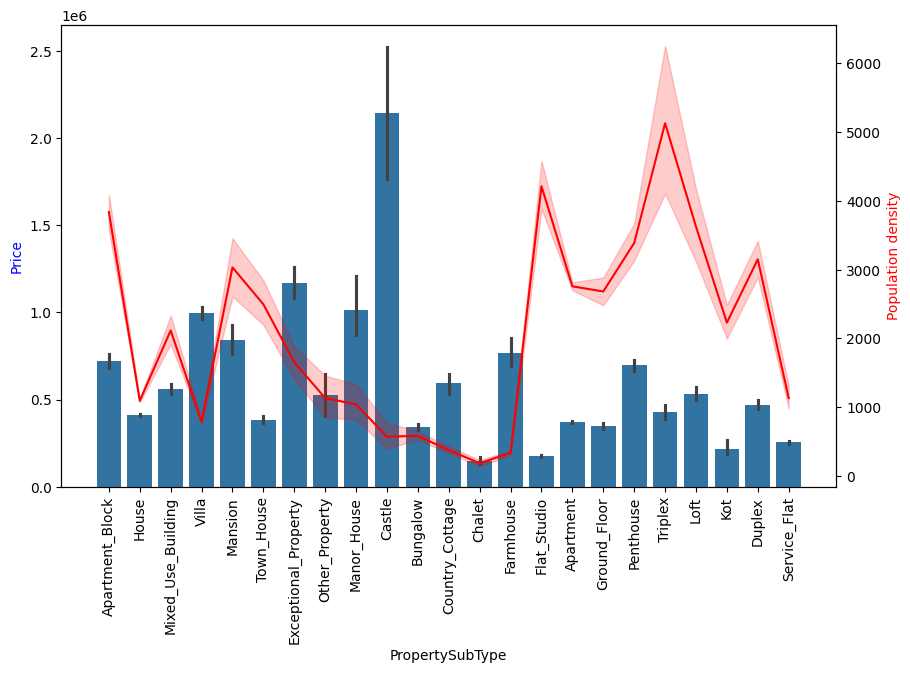

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="PropertySubType", y="Price", ax=ax)
ax.set_ylabel("Price", color='b')
plt.xticks(rotation=90)

ax2 = ax.twinx()
sns.lineplot(data=data, x="PropertySubType", y="PopulationDensity", color='red', ax=ax2)
ax2.set_ylabel("Population density", color="r")

ax2.ticklabel_format(style='plain', axis='y')

plt.show()